In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import r2_score

In [41]:
df=pd.read_csv("C:\\Users\\indian\\Desktop\\ml class\\salary.csv")

In [42]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000
8,C.level,9,250000
9,CEO,10,1000000


In [43]:
df.shape

(10, 3)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [45]:
df.drop('Position', axis=1, inplace=True)

In [46]:
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,220000
8,9,250000
9,10,1000000


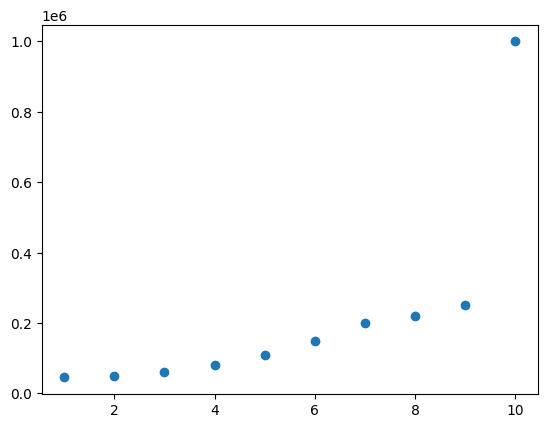

In [47]:
plt.scatter(x=df['Level '], y=df['Salary'])

<Axes: xlabel='Level '>

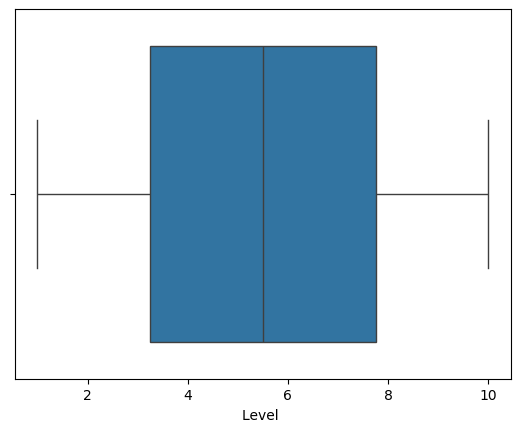

In [48]:
sns.boxplot(df, x='Level ')

<Axes: xlabel='Salary'>

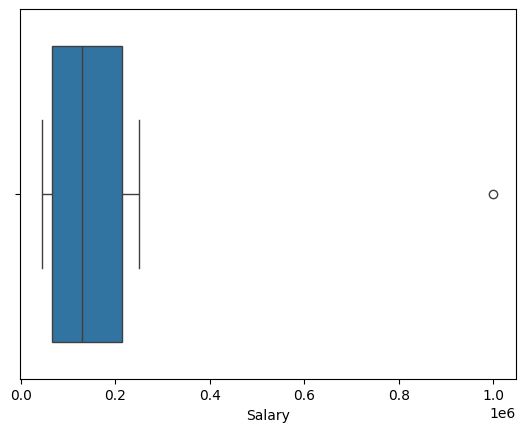

In [49]:
sns.boxplot(df, x='Salary')

<Axes: xlabel='Salary', ylabel='Density'>

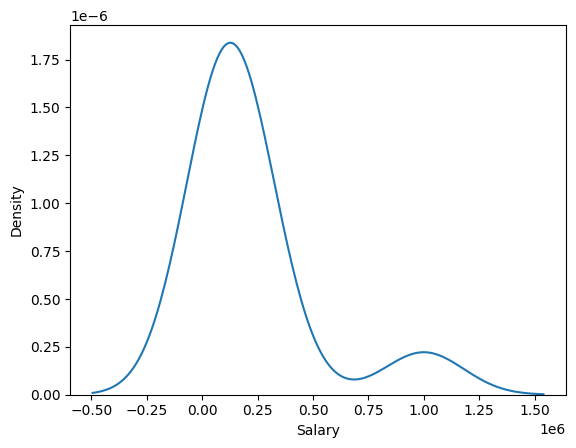

In [50]:
sns.kdeplot(df, x='Salary')

In [51]:
df['Salary'].describe()

count         10.000000
mean      216500.000000
std       285054.088435
min        45000.000000
25%        65000.000000
50%       130000.000000
75%       215000.000000
max      1000000.000000
Name: Salary, dtype: float64

Split the dataset

In [61]:
x = df.iloc[:, 0:1]

In [62]:
y = df.iloc[:, -1]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
x_train

,Level
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


In [66]:
y_train

5     150000
0      45000
7     220000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(x_train, y_train)

LinearRegression()

In [69]:
r2_score(y_test, lr.predict(x_test))

-3.5145185233353144

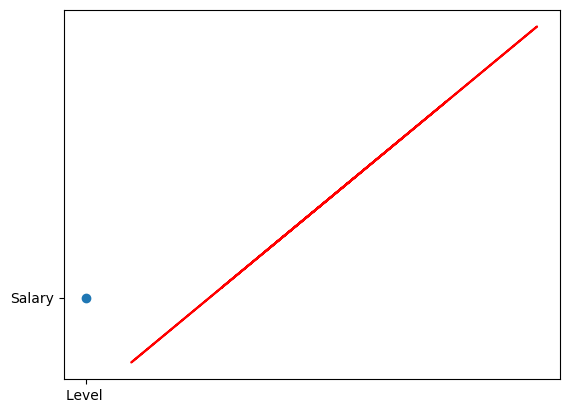

In [70]:
plt.scatter(x=['Level '], y=['Salary'])
plt.plot(x_train, lr.predict(x_train), color='red')

In [71]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [72]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [73]:
y_pred = lr.predict(x_test_trans)

In [74]:
r2_score(y_test, y_pred)

-6.3000856066966415